In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Lecture du dataset

In [30]:
netflix_df = pd.read_csv("../data/netflix_titles.csv", delimiter=",",
                         names=["show_id", "type", "title", "director", "cast", "country", "date_added", "release_year",
                                "rating", "duration"
                             , "listed_in", "description"])

Nettoyage des données : supprimer les NaN

In [31]:
netflix_df["country"] = netflix_df["country"].fillna(netflix_df["country"].mode()[0])
netflix_date = netflix_df[["date_added"]].dropna()
netflix_df["cast"] = netflix_df["cast"].fillna(netflix_df["cast"].mode()[0])

Voici le dataset que nous avons étudié :

In [32]:
display(netflix_df.head())

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
2,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
3,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
4,s4,TV Show,Jailbirds New Orleans,NaN,David Attenborough,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."


Problématique : ...

Dans un premier temps nous allons nous intéresser à nos données, quelle est la répartition des films et séries dans le dataset ?

# Films et séries

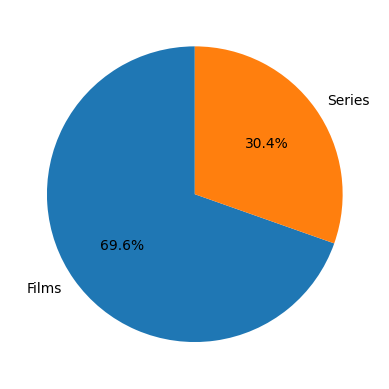

In [33]:
movie = "Movie"
tv_show = "TV Show"
netflix_movies = netflix_df[netflix_df.loc[::, "type"] == movie]
netflix_tv_shows = netflix_df[netflix_df.loc[::, "type"] == tv_show]
netflix_movies_percentage = (netflix_movies.loc[::, "type"].count() / len(netflix_df)).round(3) * 100
netflix_tv_shows_percentage = (netflix_tv_shows.loc[::, "type"].count() / len(netflix_df)).round(3) * 100
labels = "Films", "Series"
plt.pie([netflix_movies_percentage, netflix_tv_shows_percentage],
        labels=labels, autopct="%1.1f%%", startangle=90)
plt.show()

Maintenant nous voulons comptabiliser le nombre de films et séries par pays et donc de voir quels sont les pays qui produisent le plus de films et séries. Dans notre dataset, nous avons des films et séries qui sont produits dans plusieurs pays. Notre objectif est donc de comptabiliser tous les pays dans lesquels ont été produit les films.

In [34]:
def countries_by_type(content_type):
    countries = []
    for mov in netflix_df[netflix_df.loc[::, "type"] == content_type]["country"]:
        if len(mov.split(",")) > 1:
            for m in mov.split(","):
                countries.append(m.strip())
        else:
            countries.append(mov)
    return countries

Il nous faut également un fonction qui nous permet de compter combien de fois les pays apparaissent dans nos données.

In [35]:
def count_occ(liste):
    occ = {}
    for element in liste:
        if element in occ:
            occ[element] += 1
        else:
            occ[element] = 1
    return {k: v for k, v in sorted(occ.items(), key=lambda item: item[1], reverse=True)}

Nous avons défini une fonction générique pour afficher les barplot

In [36]:
def add_labels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i] // 2, y[i], ha="center")

def display_bar(dic, title, x_axis_label, y_axis_label, n=10):
    val = list(dic.keys())[:n]
    occ = list(dic.values())[:n]
    colors = ['#FFC0CB', '#FFB6C1', '#FF69B4', '#FF1493', '#DB7093', '#C71585', '#FFA07A', '#FF7F50', '#FF4500', '#FF8C00']
    plt.bar(val, occ, color=colors)
    add_labels(val, occ)
    plt.xlabel(x_axis_label)
    plt.ylabel(y_axis_label)
    plt.title(title)
    plt.xticks(rotation=90)
    plt.show()

def display_pie(elements, n=10):
    percentages = []
    keys = list(elements.keys())[:n]
    values = list(elements.values())[:n]
    for value in values :
        percentages.append((value / len(elements)) * 100)
    plt.pie(percentages, labels=keys, autopct="%1.1f%%", startangle=90)
    plt.show()

Les pays qui produisent le plus de films

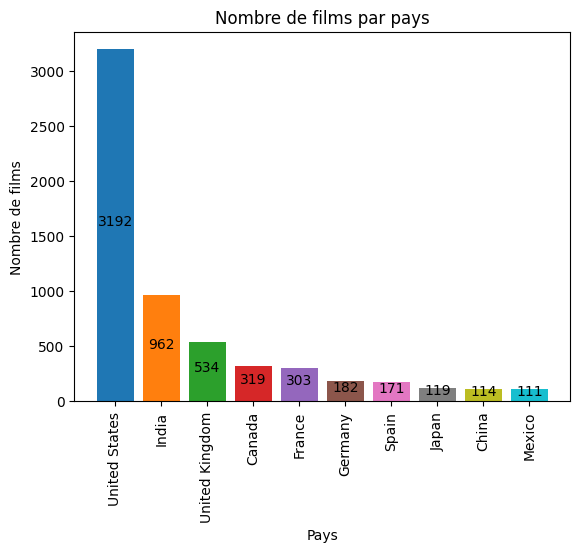

In [37]:
countries_by_movies = countries_by_type(movie)
countries_by_movies_occ = count_occ(countries_by_movies)
display_bar(countries_by_movies_occ, "Nombre de films par pays", "Pays", "Nombre de films")

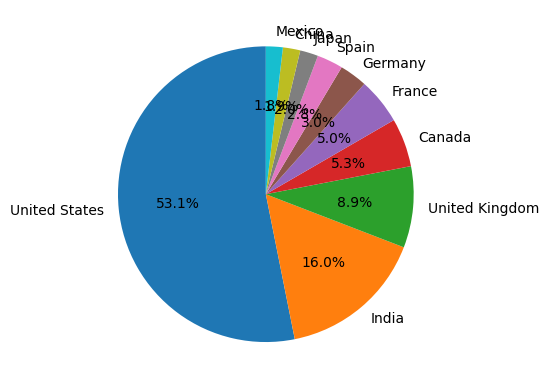

In [38]:
display_pie(countries_by_movies_occ)

Les pays qui produisent le plus de séries

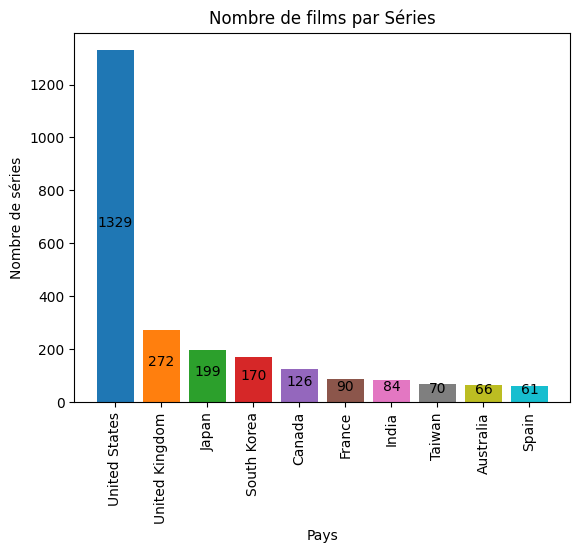

In [39]:
countries_by_tv_shows = countries_by_type(tv_show)
countries_by_tv_shows_occ = count_occ(countries_by_tv_shows)
display_bar(countries_by_tv_shows_occ, "Nombre de films par Séries", "Pays", "Nombre de séries")

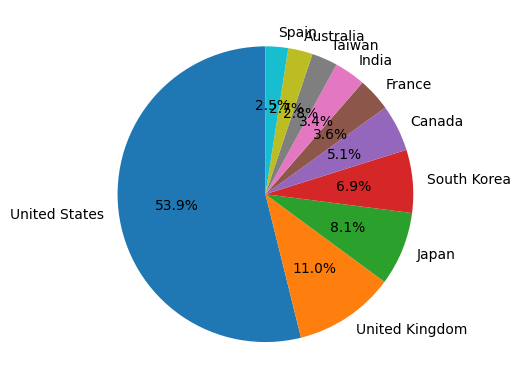

In [40]:
display_pie(countries_by_tv_shows_occ)

## Classifications
Maintenant nous allons nous intéresser aux classifications des films (ratings). Voici les classifications présentes dans notre dataset :

In [41]:
netflix_df["rating"].unique()

array(['rating', 'PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y',
       'TV-Y7', 'R', 'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min',
       'NR', nan, 'TV-Y7-FV', 'UR'], dtype=object)

Voici à quoi correspondent chaque classification :
- PG-13 : accompagnement fortement recommandé aux enfants de moins de 13 ans.
- TV-MA : programme est uniquement réservé aux adultes et inapproprié pour la jeune audience de moins de 17 ans.
- PG :
- TV-14 : programme contient des éléments que les parents peuvent considérer inappropriés pour les enfants âgés de moins de 14 ans.
- TV-PG : accord parental souhaitable pour jeune audience de moins de 10 ans.
- TV-Y : tous publics.
- TV-Y7 :
- R :
- TV-G :


En observant toutes les classifications présentes dans nos données, nous pouvons créer 4 catégories de classifications :
- Adultes : TV-MA et R.
- Adolescents : PG-13 et TV-14.
- Enfants : PG, TV-Y7 et TV-PG.
- Jeunes enfants : TV-Y et TV-G.

Maintenant, nous allons compter le nombre de films dans chaque classification :

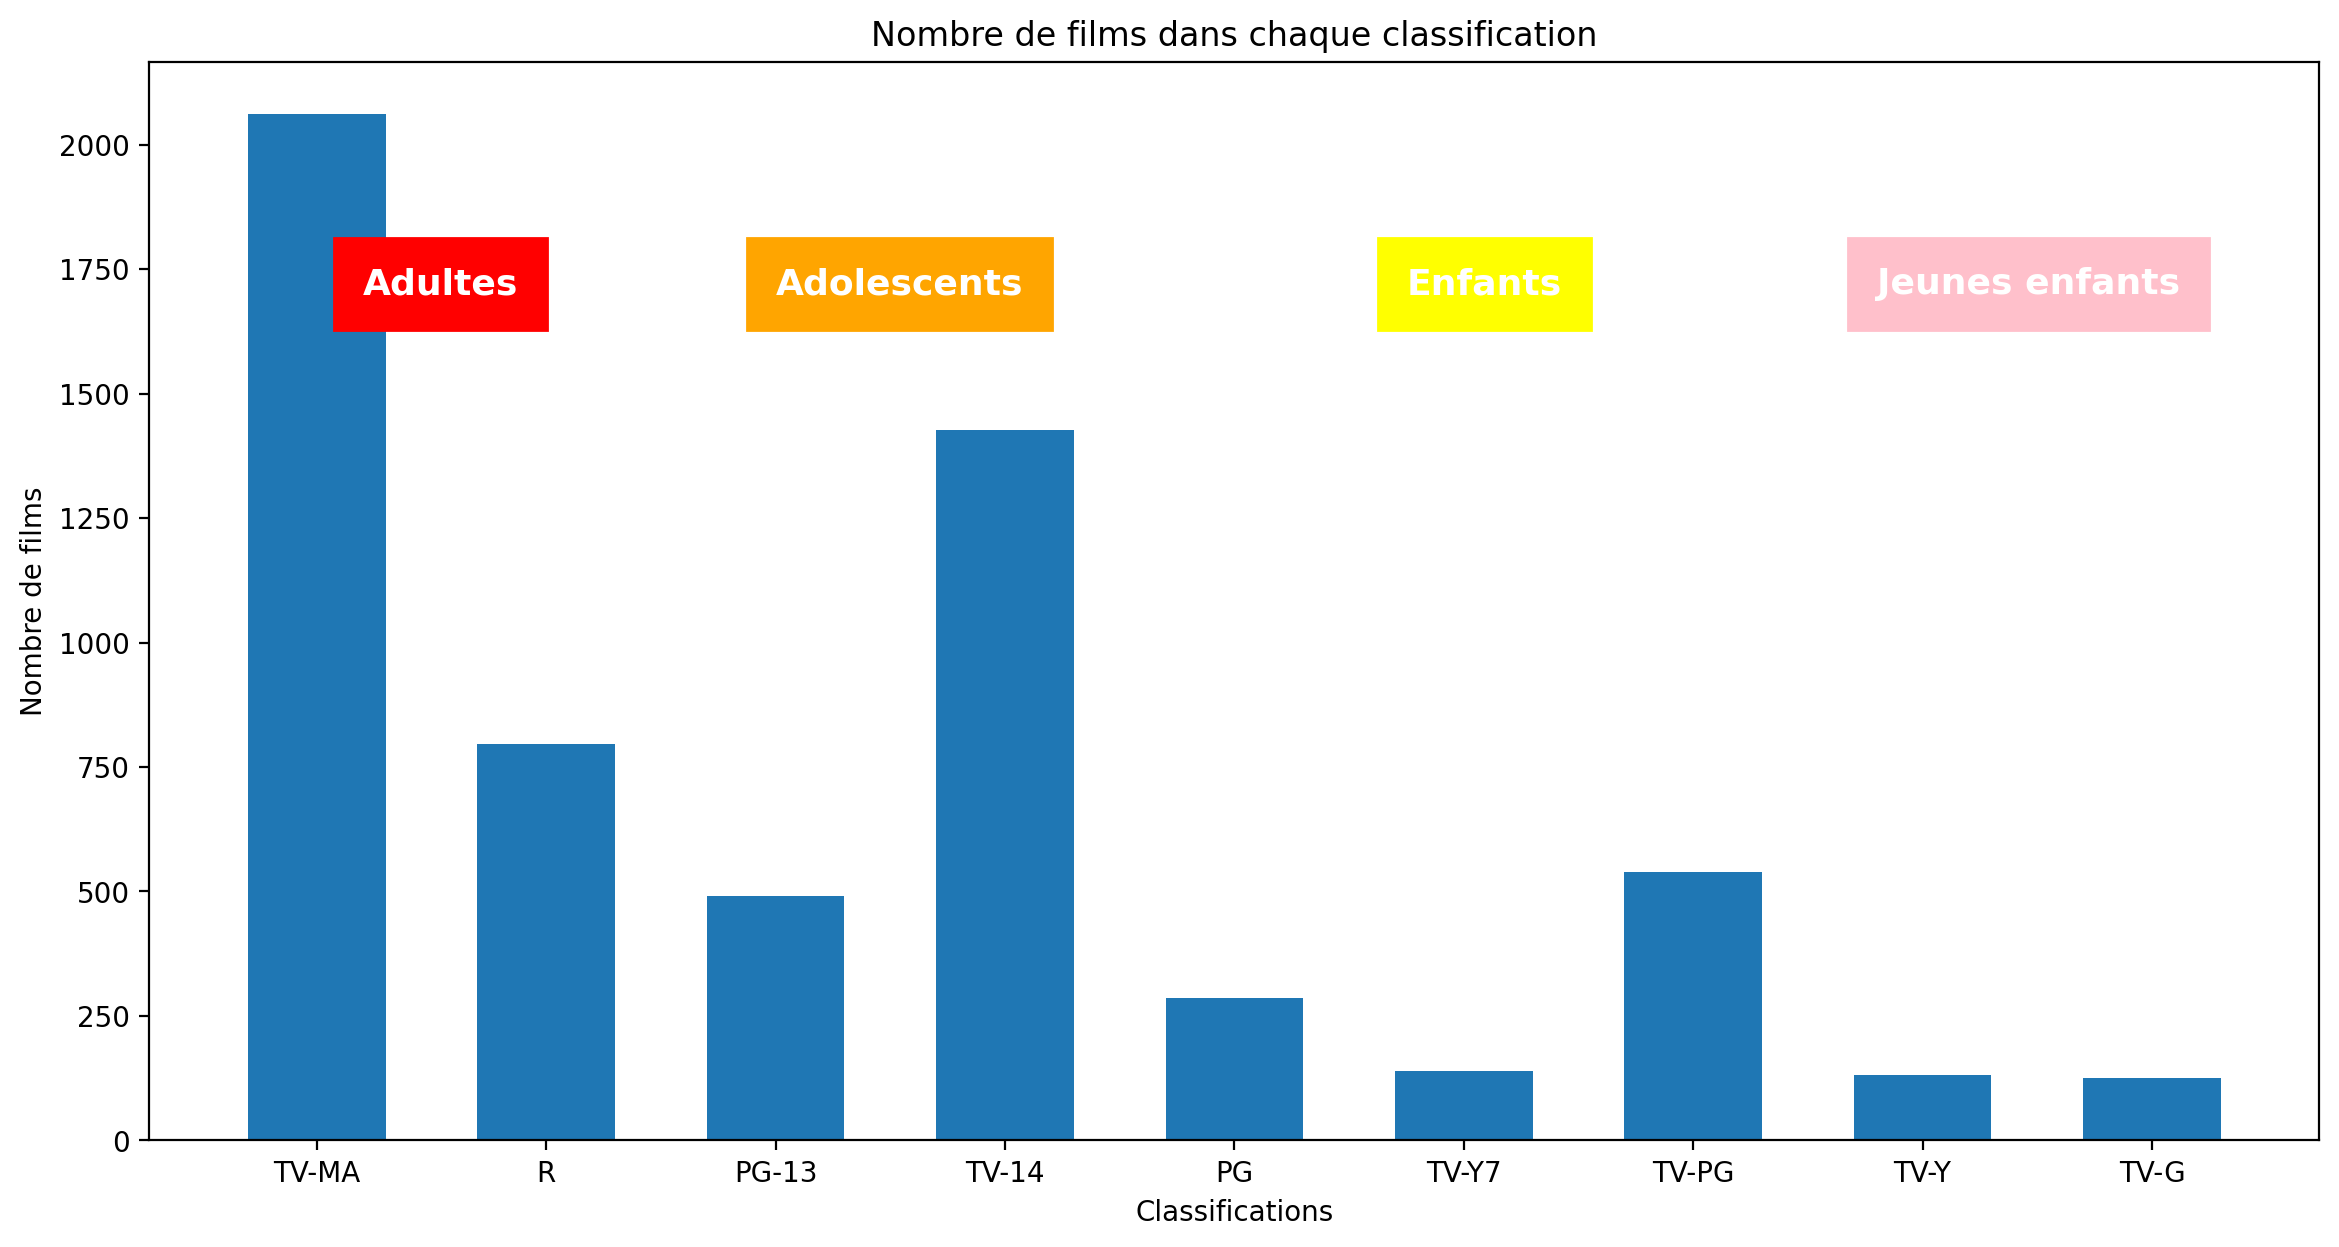

In [42]:
categories = ["Adultes", "Adolescents", "Enfants", "Jeunes enfants"]

ratings_m = ["TV-MA", "R", "PG-13", "TV-14", "PG", "TV-Y7", "TV-PG", "TV-Y", "TV-G"]

movie_rating = netflix_movies["rating"].value_counts()[ratings_m]

fig, ax = plt.subplots(1, 1, figsize=(14, 7), dpi=200)
ax.bar(movie_rating.index, movie_rating, width=0.6)
ax.set_title("Nombre de films dans chaque classification")
plt.xlabel("Classifications")
plt.ylabel("Nombre de films")
ax.annotate("Adultes", xy=(0.2, 1700), color="w", fontsize=13, fontweight="bold", bbox=dict(boxstyle="square", pad=0.8, color="red"))
ax.annotate("Adolescents", xy=(2, 1700), color="w", fontsize=13, fontweight="bold", bbox=dict(boxstyle="square", pad=0.8, color="orange"))
ax.annotate("Enfants", xy=(4.75, 1700), color="w", fontsize=13, fontweight="bold", bbox=dict(boxstyle="square", pad=0.8, color="yellow"))
ax.annotate("Jeunes enfants", xy=(6.8, 1700), color="w", fontsize=13, fontweight="bold", bbox=dict(boxstyle="square", pad=0.8, color="pink"))
plt.show()

et le nombre de séries dans chaque classification :

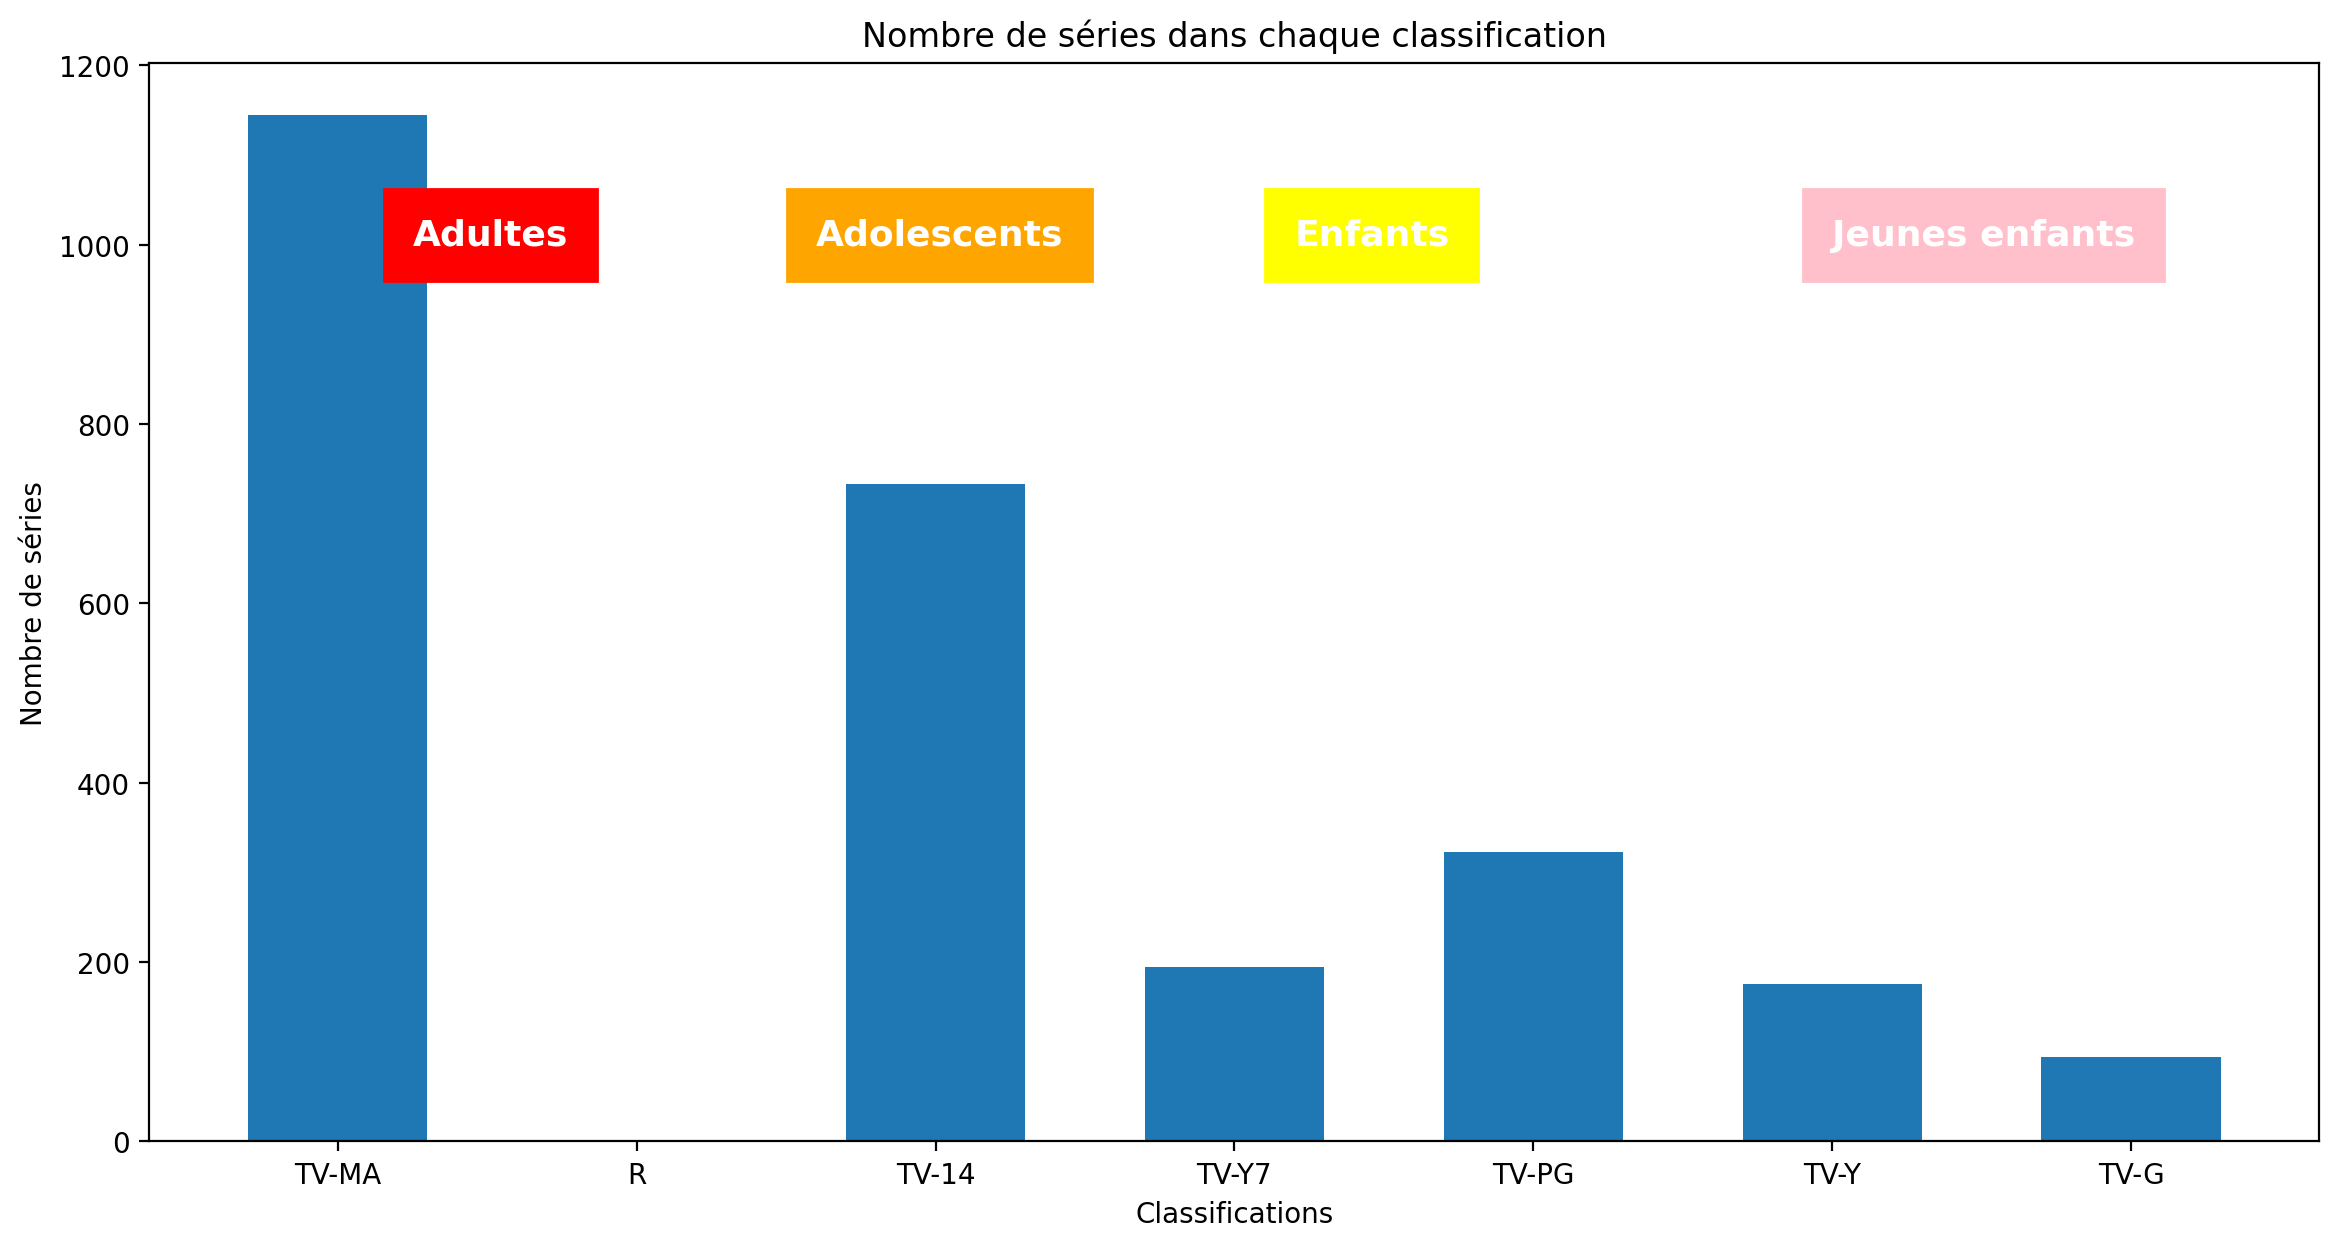

In [43]:
ratings_ts = ["TV-MA", "R", "TV-14", "TV-Y7", "TV-PG", "TV-Y", "TV-G"]
tv_show_rating = netflix_tv_shows["rating"].value_counts()[ratings_ts]

fig, ax = plt.subplots(1, 1, figsize=(14, 7), dpi=200)
ax.bar(tv_show_rating.index, tv_show_rating, width=0.6)
ax.set_title("Nombre de séries dans chaque classification")
plt.xlabel("Classifications")
plt.ylabel("Nombre de séries")
ax.annotate("Adultes", xy=(0.25, 1000), color="w", fontsize=13, fontweight="bold", bbox=dict(boxstyle="square", pad=0.8, color="red"))
ax.annotate("Adolescents", xy=(1.6, 1000), color="w", fontsize=13, fontweight="bold", bbox=dict(boxstyle="square", pad=0.8, color="orange"))
ax.annotate("Enfants", xy=(3.2, 1000), color="w", fontsize=13, fontweight="bold", bbox=dict(boxstyle="square", pad=0.8, color="yellow"))
ax.annotate("Jeunes enfants", xy=(5, 1000), color="w", fontsize=13, fontweight="bold", bbox=dict(boxstyle="square", pad=0.8, color="pink"))
plt.show()

## Genres

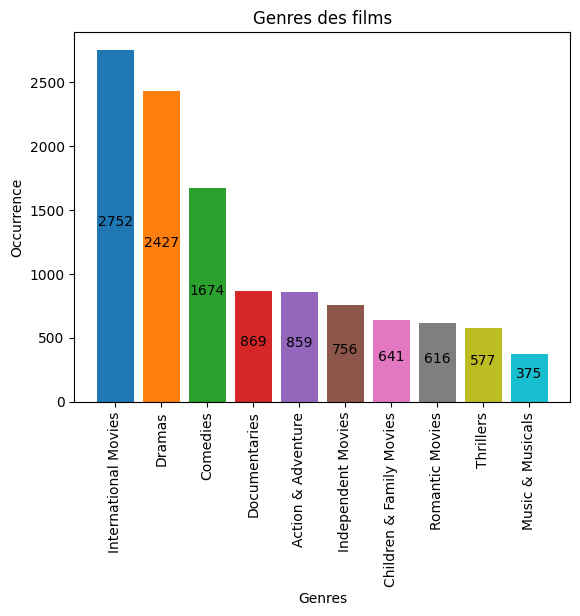

In [44]:
def get_all_genres(content_type):
    genres = []
    for genre in netflix_df[netflix_df.loc[::, "type"] == content_type]["listed_in"]:
        if len(genre.split(",")) > 1:
            for g in genre.split(","):
                genres.append(g.strip())
        else:
            genres.append(genre)
    return genres
movie_genres = get_all_genres(movie)
movie_genres_occ = count_occ(movie_genres)
display_bar(movie_genres_occ, "Genres des films", "Genres", "Occurrence")

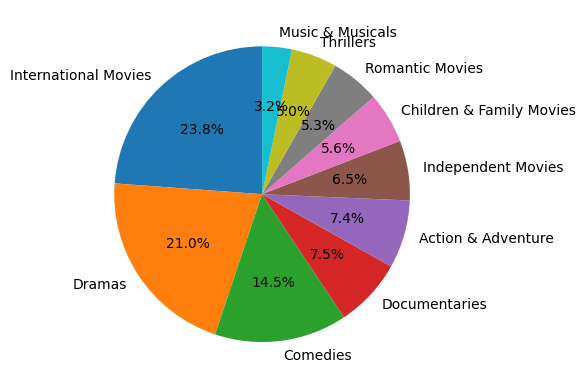

In [45]:
display_pie(movie_genres_occ)

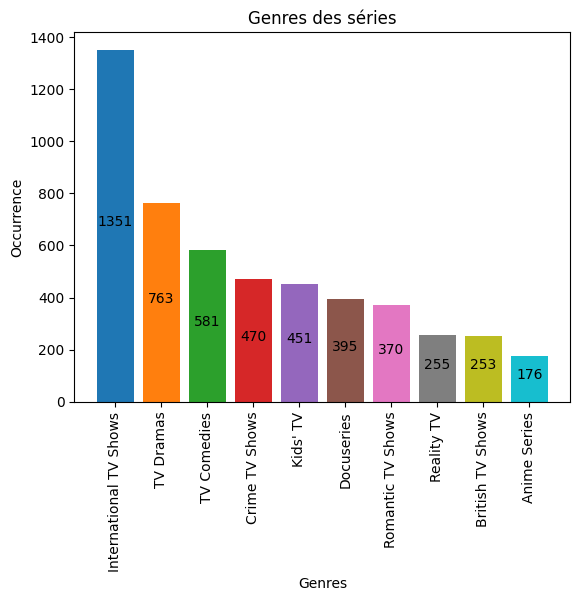

In [46]:
tv_show_genres = get_all_genres(tv_show)
tv_show_genres_occ = count_occ(tv_show_genres)
display_bar(tv_show_genres_occ, "Genres des séries", "Genres", "Occurrence")

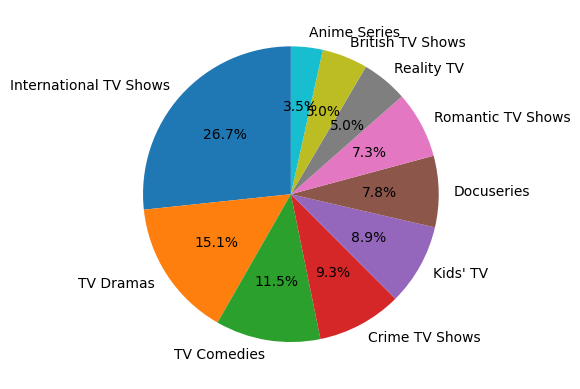

In [47]:
display_pie(tv_show_genres_occ)

## Années de sortie
Maintenant nous allons voir à quelles sont les années de sortie des films présents sur netflix :

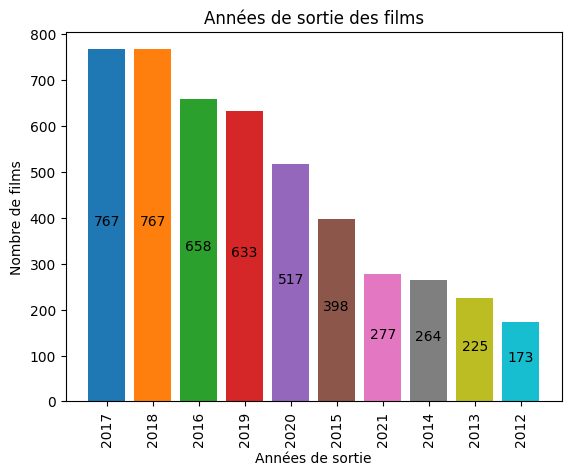

In [48]:
movies_release = netflix_df["release_year"][netflix_df.loc[::, "type"] == movie]
movies_release_occ = count_occ(movies_release)
display_bar(movies_release_occ, "Années de sortie des films", "Années de sortie", "Nombre de films")

et les années de sortie des séries :

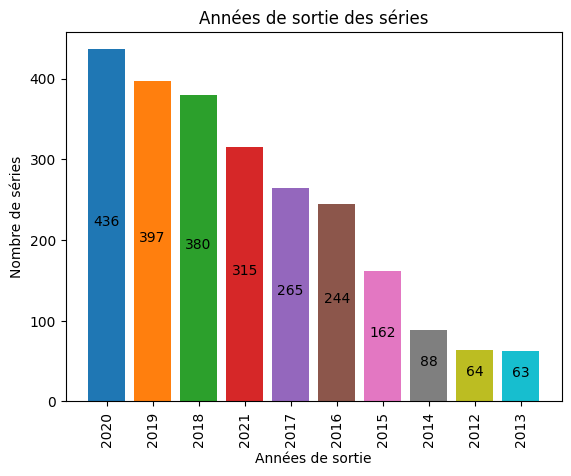

In [49]:
tv_shows_release = netflix_df["release_year"][netflix_df.loc[::, "type"] == tv_show]
tv_shows_release_occ = count_occ(tv_shows_release)
display_bar(tv_shows_release_occ, "Années de sortie des séries", "Années de sortie", "Nombre de séries")

## Périodes d'ajout de contenu

Maintenant nous allons voir dans quels sont les mois dans lesquels netflix ajoute le plus de contenu.

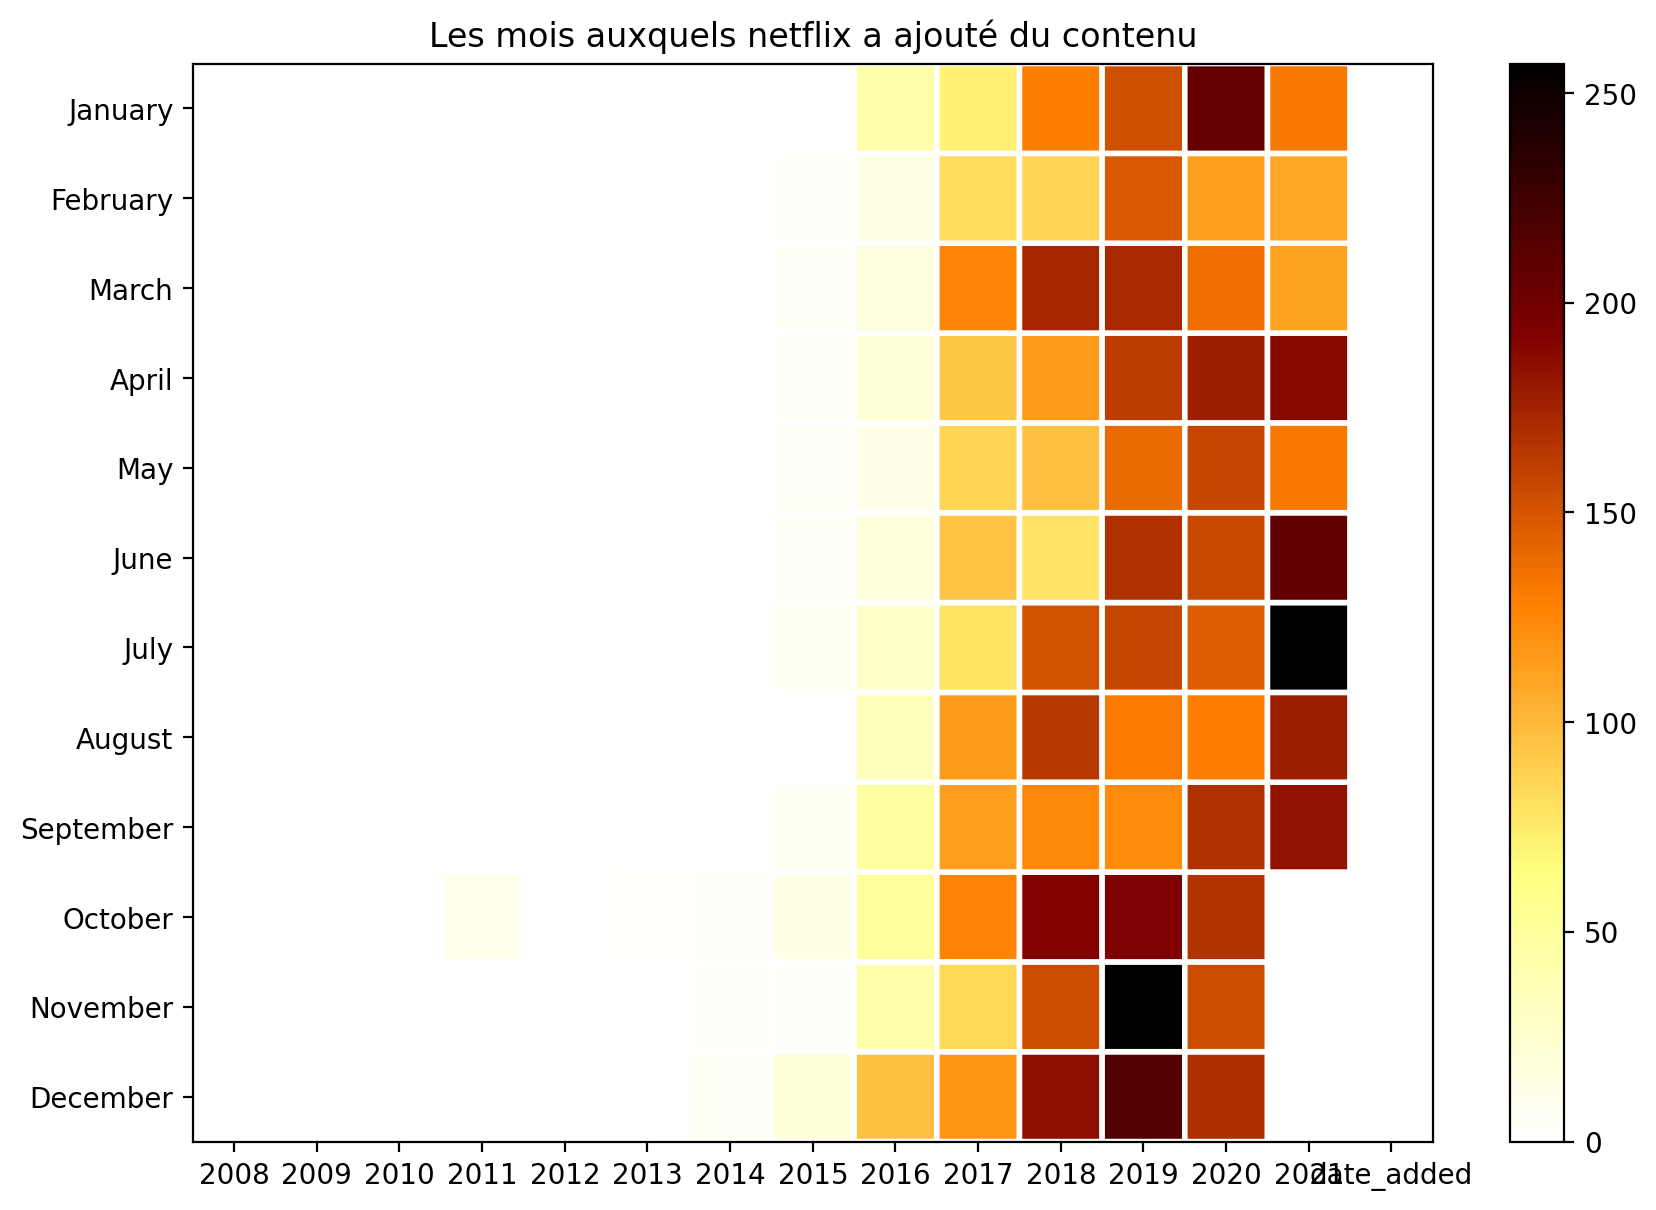

In [50]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"][::-1]

netflix_date["year"] =  netflix_df["date_added"].dropna().apply(lambda x: x.split(", ")[-1])
netflix_date["month"] =  netflix_df["date_added"].dropna().apply(lambda x: x.lstrip().split(" ")[0])

netflix_date_df = netflix_date.groupby("year")["month"].value_counts().unstack().fillna(0)[months].T
plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(netflix_date_df, cmap="afmhot_r", edgecolors="w", linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(netflix_date_df.columns), 1), netflix_date_df.columns)
plt.yticks(np.arange(0.5, len(netflix_date_df.index), 1), netflix_date_df.index)

plt.title("Les mois auxquels netflix a ajouté du contenu")
plt.colorbar()

plt.show()

On peut regarder le différentiel entre année de sortie d'un film et l'année d'ajout sur netflix de façon globale :

In [51]:
netflix_date["year_added"] = netflix_df["date_added"].dropna().apply(lambda x: x.split(", ")[-1])
netflix_date["release_year"] = netflix_df["release_year"].dropna()

netflix_date["year_added"][0] = 0
netflix_date["release_year"][0] = 0

def mean_release_added_year():
    result = 0
    for index, row in netflix_date.iterrows():
        result += int(row["year_added"]) - int(row["release_year"])
    return result/len(netflix_date)

print(mean_release_added_year())


4.687883609911344


# Acteurs
On s'intéresse dans un premier aux acteurs les plus présents dans les films

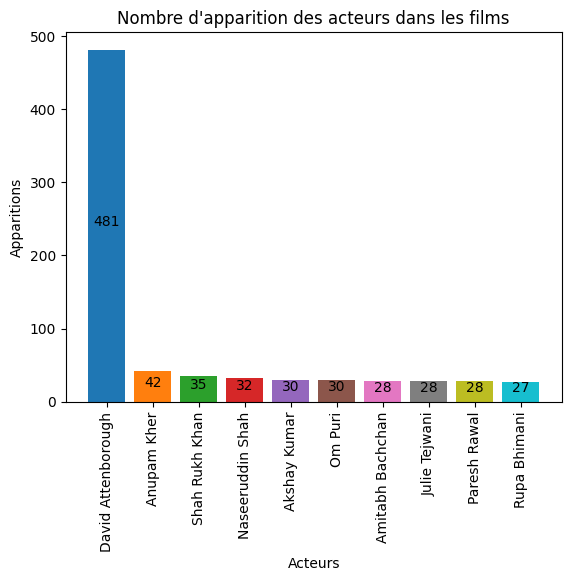

In [52]:
def get_actors(content_type):
    actors = []
    for actor in netflix_df["cast"][netflix_df.loc[::, "type"] == content_type]:
        if len(actor.split(",")) > 1:
            for a in actor.split(","):
                actors.append(a.strip())
        else:
            actors.append(actor)
    return actors

movie_actors = get_actors(movie)
movie_actors_occ = count_occ(movie_actors)
display_bar(movie_actors_occ, "Nombre d'apparition des acteurs dans les films", "Acteurs", "Apparitions")

et des séries :

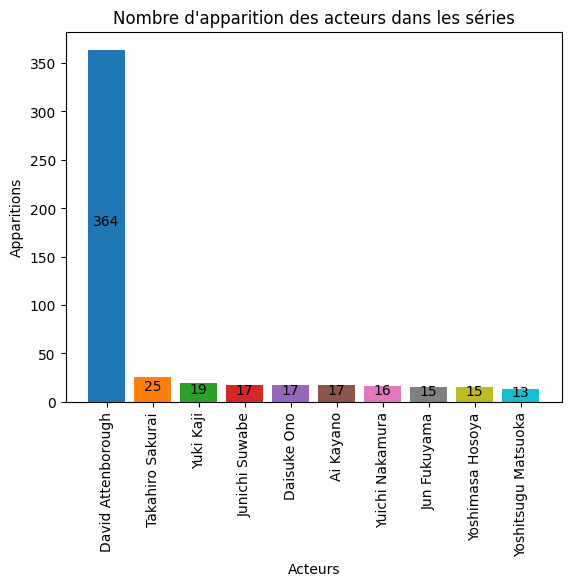

In [53]:
tv_show_actors = get_actors(tv_show)
tv_show_actors_occ = count_occ(tv_show_actors)
display_bar(tv_show_actors_occ, "Nombre d'apparition des acteurs dans les séries", "Acteurs", "Apparitions")